Week 08 Assignment<br>
Submitted by: Chris Panican<br>
Intro to Machine Learning CSc 55929<br>
Prof. Erik Grimmelmann<br>

In [1]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [0,1,2,3]]
y = iris.target

# Gini Impurity

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [4]:
# Fit for various depth trees
MaxDepth = 8
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train)

    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])


Max Depth, Training, Test
1 0.33333333333333337 0.33333333333333337
2 0.053333333333333344 0.040000000000000036
3 0.053333333333333344 0.040000000000000036
4 0.040000000000000036 0.013333333333333308
5 0.013333333333333308 0.040000000000000036
6 0.0 0.026666666666666616
7 0.0 0.026666666666666616
8 0.0 0.026666666666666616


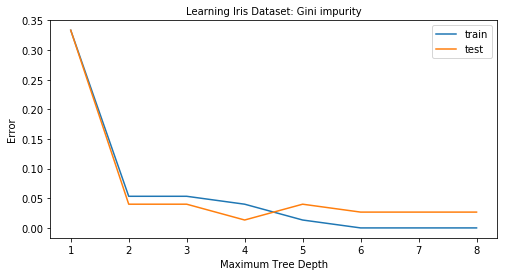

In [5]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset: Gini impurity', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

# Entropy Impurity

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [7]:
# Fit for various depth trees
MaxDepth = 8
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train)

    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])


Max Depth, Training, Test
1 0.33333333333333337 0.33333333333333337
2 0.053333333333333344 0.040000000000000036
3 0.053333333333333344 0.040000000000000036
4 0.053333333333333344 0.040000000000000036
5 0.026666666666666616 0.040000000000000036
6 0.013333333333333308 0.026666666666666616
7 0.013333333333333308 0.040000000000000036
8 0.0 0.040000000000000036


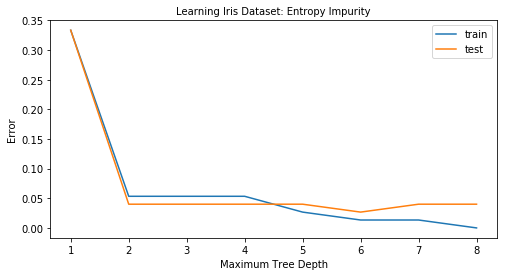

In [8]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset: Entropy Impurity', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

# Week 8 assignment: 
* Apply the Scikit Learn AdaBoost Classifier code to the Iris dataset using all three categories and all four feature at once and upload your .ipynb file. Use a Decision Tree Classifier at your base classifier. Try using decision trees of varying depths for the base classifier. <br>
* Compare your results with those you obtained last week when you used the Scikit Decision Tree Classifier code to the Iris dataset using all three categories and all four feature at once.

In [9]:
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:, :4]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [10]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)

Without AdaBoost Model

In [11]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

Decision tree train/test accuracies 0.667/0.667


Improving fit with AdaBoost Model

In [12]:
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

AdaBoost train/test accuracies 0.956/0.943


This shows that AdaBoost Model is usually better than Decision Tree since accuracy values on AdaBoost are higher

## Compare Decision Tree Classifier vs. AdaBoost Classifier

1 0.33333333333333337 0.33333333333333337
2 0.0444444444444444 0.04761904761904767
3 0.0444444444444444 0.04761904761904767
4 0.0 0.05714285714285716
5 0.0 0.05714285714285716
6 0.0 0.05714285714285716
7 0.0 0.05714285714285716
8 0.0 0.05714285714285716


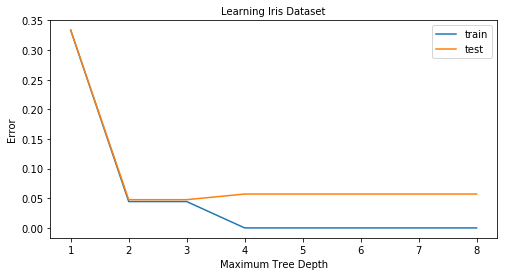

In [13]:
MaxDepth = 8
Errors = np.zeros((MaxDepth,2))

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=1)
    tree.fit(X_train, y_train)
    
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

1 0.06666666666666665 0.06666666666666665
2 0.0 0.06666666666666665
3 0.0 0.03809523809523807
4 0.0 0.05714285714285716
5 0.0 0.05714285714285716
6 0.0 0.05714285714285716
7 0.0 0.05714285714285716
8 0.0 0.05714285714285716


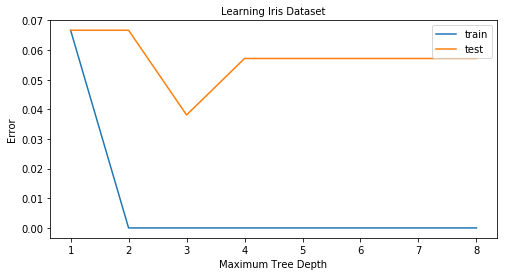

In [14]:
MaxDepth = 8
Errors = np.zeros((MaxDepth,2))

for i in range(0,MaxDepth):
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i+1), learning_rate=0.1, random_state=1)
    ada.fit(X_train, y_train)
    
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))


    Errors[i,0] = 1 - ada.score(X_train,y_train)
    Errors[i,1] = 1 - ada.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

# Summary

For this assignment, we were tasked to apply the Scikit learn AdaBoost classifier to our iris dataset. The AdaBoost classifier is used to improve weak learners to strong learners. As seen on this assignment, the AdaBoost classifier had higher accuracy when compared to DecisionTree classifier (0.956 on AdaBoost vs 0.667 on DecisionTree).<br>
We also looked at the previous classifiers that we used in previous assignment. Gini and Entropy from DecisionTree Classifier, both yeilded worse results than AdaBoost classifier since it took them more steps to reach the target value of 0.057. 